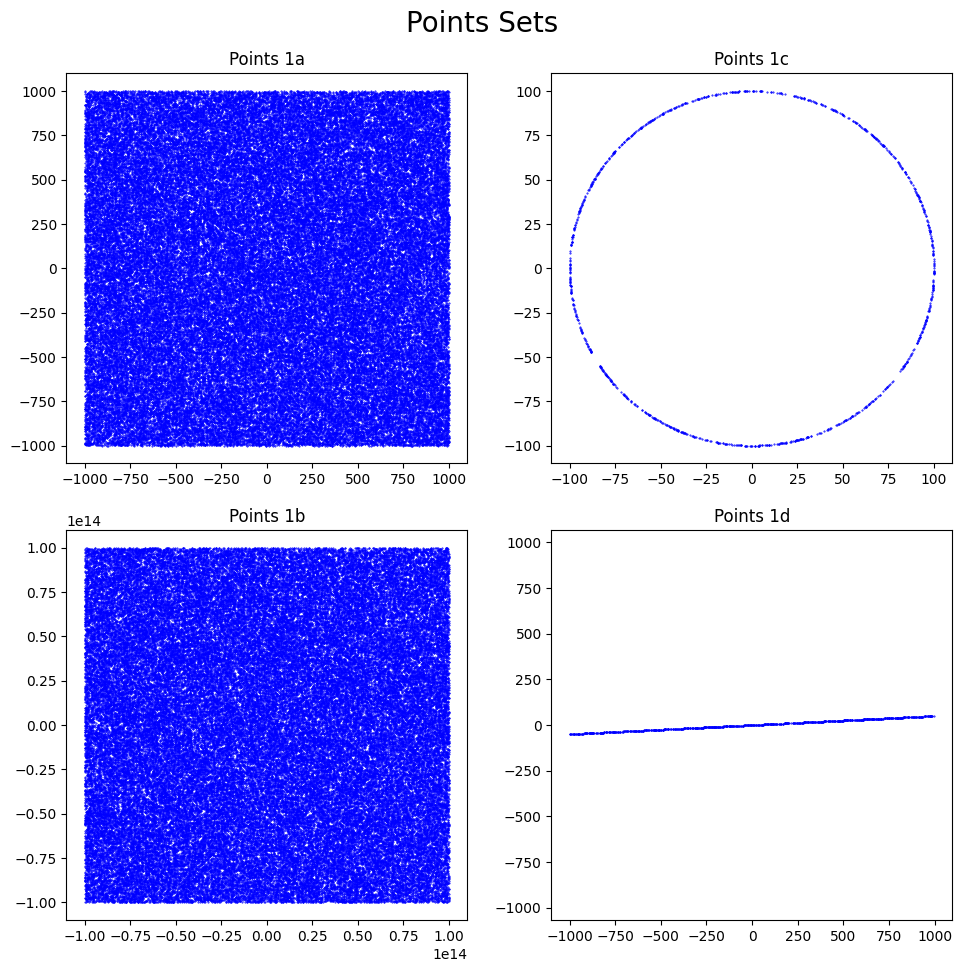

In [10]:
%matplotlib inline
import  matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import math

random.seed(1)
matplotlib.rcParams['figure.figsize'] = [10, 10]

data = []

# generating 1a
data.append(np.random.uniform(-1000, 1000, [10**5, 2]))

# generating 1b
data.append(np.random.uniform(-10**14, 10**14, [10**5, 2]))

# generating 1c
data.append(np.array([[100*math.sin(angle),  100*math.cos(angle)] for angle in np.random.uniform(0, 2*math.pi, 1000)]))

# generating 1d
a, b = [-1, 0], [1, 0.1]
m = (a[1] - b[1]) / (a[0] - b[0])
u = a[1] - m * a[0]

data.append(np.array([[x, x*m + u] for x in np.random.uniform(-1000, 1000, 1000)]))

# Plotting  data
figure, axis = plt.subplots(2, 2)
plt.axis("equal")
for i, data_set in enumerate(data):
    axis[i%2, i//2].scatter(*zip(*data_set), color="blue", s=0.2)

figure.suptitle('Points Sets', fontsize=20)
figure.tight_layout(pad=2)
axis[0, 0].set_title("Points 1a")
axis[0, 1].set_title("Points 1c")
axis[1, 0].set_title("Points 1b")
axis[1, 1].set_title("Points 1d")

plt.savefig('images/sets_vis.png', dpi=1000)
plt.show()



Calculating 2x2 NumPy det took: 0.034906625747680664s.
Calculating 3x3 NumPy det took: 0.05088186264038086s.
Calculating my 2x2 det took: 0.29526519775390625s.


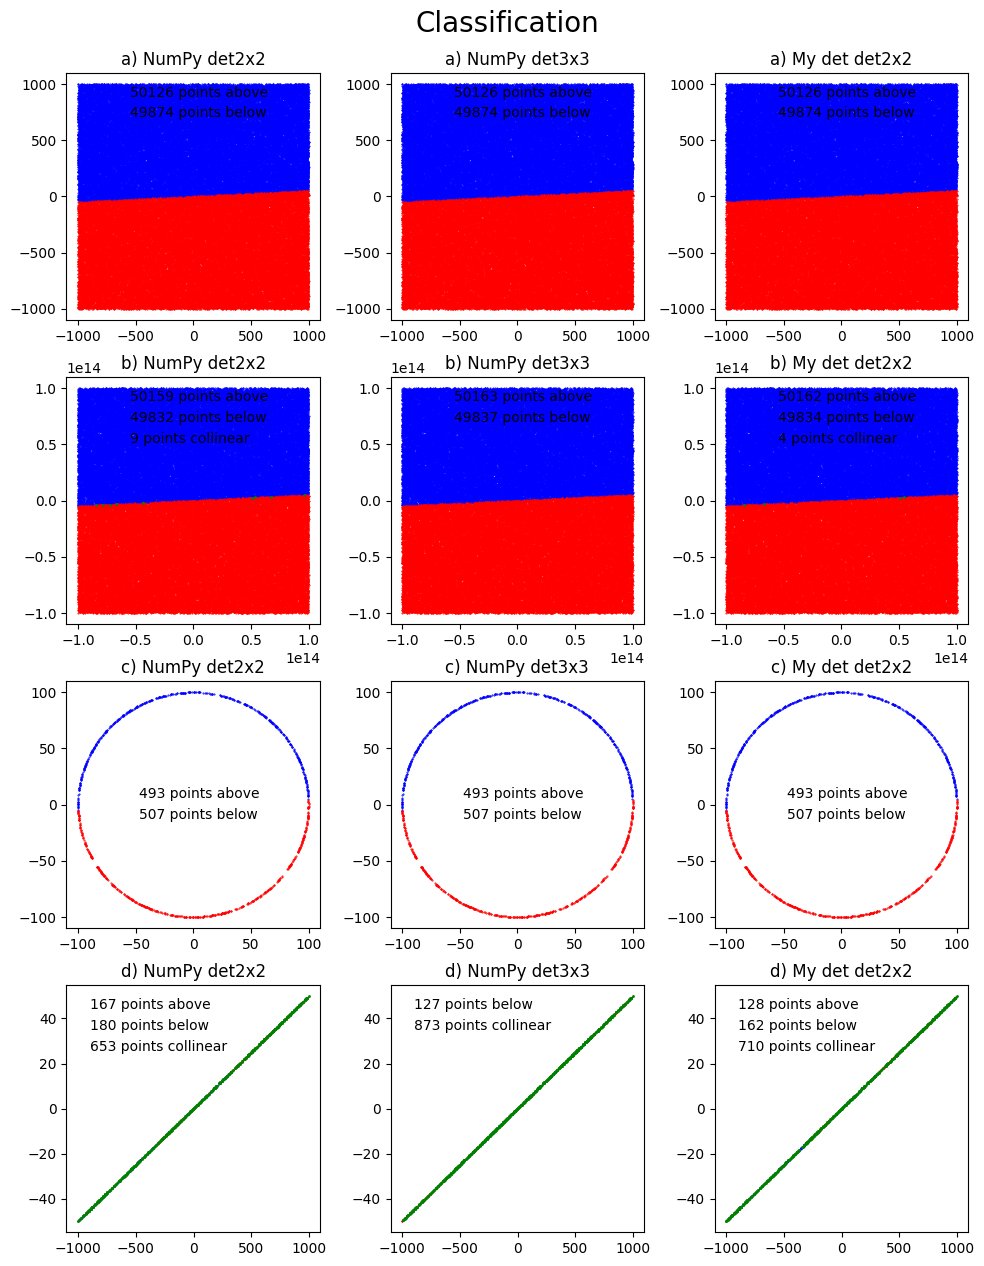

In [12]:
# dividing sets of points in respect to line a, b
from ctypes.wintypes import POINT
import time

eps = 10**(-14)


matplotlib.rcParams['figure.figsize'] = [10, 13]
matplotlib.rcParams['legend.handlelength'] = 0
figure, axis = plt.subplots(4, 3)
figure.suptitle('Classification', fontsize=20)
figure.tight_layout(pad=2)

for det_method in range(3):

    det_data = []

    # 2x2 det numpy
    if det_method == 0:
        
        start = time.time()

        for point_set in data:
            det_array = np.linalg.det(np.dstack((np.tile(a, (len(point_set), 1)) - point_set, np.tile(b, (len(point_set), 1)) - point_set)))
            det_data.append(det_array)
        
        end = time.time()
        print("Calculating 2x2 NumPy det took: ", end - start, "s.", sep="")
    
    # 3x3 numpy
    if det_method == 1:
        
        start = time.time()

        vec3_a = np.array(a + [1])
        vec3_b = np.array(b + [1])
        one = np.array([1])

        for point_set in data:
            det_array = np.linalg.det(np.dstack((np.tile(vec3_a, (len(point_set), 1)), np.tile(vec3_b, (len(point_set), 1)), np.hstack((point_set, np.tile(one, (len(point_set), 1)))))))
            det_data.append(det_array)
        
        end = time.time()
        print("Calculating 3x3 NumPy det took: ", end - start, "s.", sep="")
    
    # my 2x2 det implementation
    if det_method == 2:
        
        start = time.time()

        for point_set in data:
            det_array = [0 for _ in range(len(point_set))]

            for i, point in enumerate(point_set):
                det_array[i] = (a[0] - point[0])*(b[1] - point[1]) - (b[0] - point[0])*(a[1] - point[1])

            det_data.append(det_array)
        
        end = time.time()
        print("Calculating my 2x2 det took: ", end - start, "s.", sep="")

    # plotting function
    for i, point_set in enumerate(data):
        points_above = []
        points_on = []
        points_below = []
        for j, point in enumerate(point_set):
            if abs(det_data[i][j]) <= eps:
                points_on.append(point)
            elif det_data[i][j] < 0:
                points_below.append(point)
            else:
                points_above.append(point)
        
        handle_labels = []
        if len(points_above) > 0:
            axis[i, det_method].scatter(*zip(*points_above), color="blue", s=0.2)
            blue = mpatches.Patch(alpha = 0, label=f"{len(points_above)} points above")
            handle_labels.append(blue)
        if len(points_below) > 0:         
            axis[i, det_method].scatter(*zip(*points_below), color="red", s=0.2)
            red = mpatches.Patch(alpha = 0, label=f"{len(points_below)} points below")
            handle_labels.append(red)
        if len(points_on) > 0:
            axis[i, det_method].scatter(*zip(*points_on), color="green", s=1)
            green = mpatches.Patch(alpha = 0, label=f"{len(points_on)} points collinear")
            handle_labels.append(green)

        axis[i, det_method].legend(handles=handle_labels, loc=9, frameon=False)
        if i == 2:
            axis[i, det_method].legend(handles=handle_labels, loc=10, frameon=False)
        if i == 3:
            axis[i, det_method].legend(handles=handle_labels, loc="upper left", frameon=False)
        
        

        
        
axis[0, 0].set_title("a) NumPy det2x2")
axis[0, 1].set_title("a) NumPy det3x3")
axis[0, 2].set_title("a) My det det2x2")
axis[1, 0].set_title("b) NumPy det2x2")
axis[1, 1].set_title("b) NumPy det3x3")
axis[1, 2].set_title("b) My det det2x2")
axis[2, 0].set_title("c) NumPy det2x2")
axis[2, 1].set_title("c) NumPy det3x3")
axis[2, 2].set_title("c) My det det2x2")
axis[3, 0].set_title("d) NumPy det2x2")
axis[3, 1].set_title("d) NumPy det3x3")
axis[3, 2].set_title("d) My det det2x2")

plt.savefig('images/line.png', dpi=1000)
plt.show()
        
    